# Test Case 2 - Single Capacitor


In [1]:
from CircuitCalculator.Circuit.solution import TransientSolution
from CircuitCalculator.Circuit.circuit import Circuit
from CircuitCalculator.Circuit import components as cmp
import numpy as np
import matplotlib.pyplot as plt

## Setup Circuit

In [2]:
V0 = 5
R1, R2, R3 = 10, 20, 30
C = 1e-3
circuit = Circuit([
    cmp.dc_voltage_source(id='Vs', V=V0, nodes=('1', '0')),
    cmp.resistor(id='R1', R=R1, nodes=('1', '2')),
    cmp.resistor(id='R2', R=R2, nodes=('2', '0')),
    cmp.capacitor(id='C', C=C, nodes=('2', '3')),
    cmp.resistor(id='R3', R=R3, nodes=('3', '0')),
    cmp.ground(nodes=('0',))
])

### Setup Solution

In [3]:
def step(t: np.ndarray) -> np.ndarray:
    return np.heaviside(t, 1)

In [4]:
t_max = 0.3
t0 = 0.1
Ts = 0.0003
t = np.arange(0, t_max, Ts)
V = V0*step(t-t0)

### Calculate Solution

In [5]:
solution = TransientSolution(
    circuit=circuit,
    tin=t,
    input={'Vs': lambda t: V0*np.heaviside(t-t0, 1)},
)

### Calculate Reference

In [6]:
tau = C*(R1*R2+R1*R3+R2*R3)/(R1+R2)

uC_ref = V*R2/(R1+R2)*(1-np.exp(-(solution.t-t0)/tau))
iC_ref = C*V*R2/(R1+R2)/tau*np.exp(-(solution.t-t0)/tau)

uR3_ref = iC_ref*R3
uR2_ref = uC_ref + uR3_ref
uR1_ref = V - uR2_ref

phi1_ref = uR2_ref
phi2_ref = uR3_ref

iR1_ref = uR1_ref/R1
iR2_ref = uR2_ref/R2
iR3_ref = uR3_ref/R3

### Plot Solution

(0.0, 0.3)

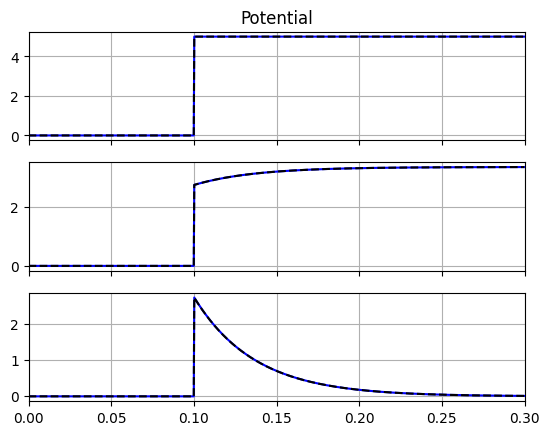

In [7]:
_, ax = plt.subplots(nrows=3, sharex=True)
ax[0].plot(*solution.get_potential('1'), 'b-')
ax[0].plot(solution.t, V, 'k--')
ax[0].grid(True)
ax[0].set_title('Potential')

ax[1].plot(*solution.get_potential('2'), 'b-')
ax[1].plot(solution.t, phi1_ref, 'k--')
ax[1].grid(True)

ax[2].plot(*solution.get_potential('3'), 'b-')
ax[2].plot(solution.t, phi2_ref, 'k--')
ax[2].grid(True)
ax[2].set_xlim((0, t_max))

(0.0, 0.3)

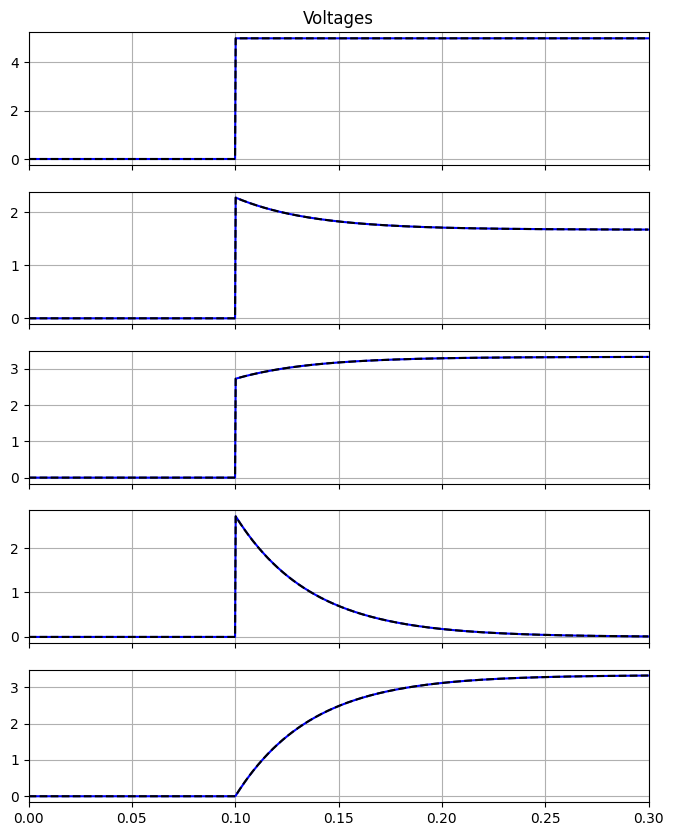

In [8]:
_, ax = plt.subplots(nrows=5, sharex=True, figsize=(8, 10))
ax[0].plot(*solution.get_voltage('Vs'), 'b-')
ax[0].plot(t, V, 'k--')
ax[0].grid(True)
ax[0].set_title('Voltages')

ax[1].plot(*solution.get_voltage('R1'), 'b-')
ax[1].plot(solution.t, uR1_ref, 'k--')
ax[1].grid(True)

ax[2].plot(*solution.get_voltage('R2'), 'b-')
ax[2].plot(solution.t, uR2_ref, 'k--')
ax[2].grid(True)

ax[3].plot(*solution.get_voltage('R3'), 'b-')
ax[3].plot(solution.t, uR3_ref, 'k--')
ax[3].grid(True)

ax[4].plot(*solution.get_voltage('C'), 'b-')
ax[4].plot(solution.t, uC_ref, 'k--')
ax[4].grid(True)
ax[4].set_xlim((0, t_max))

(0.0, 0.3)

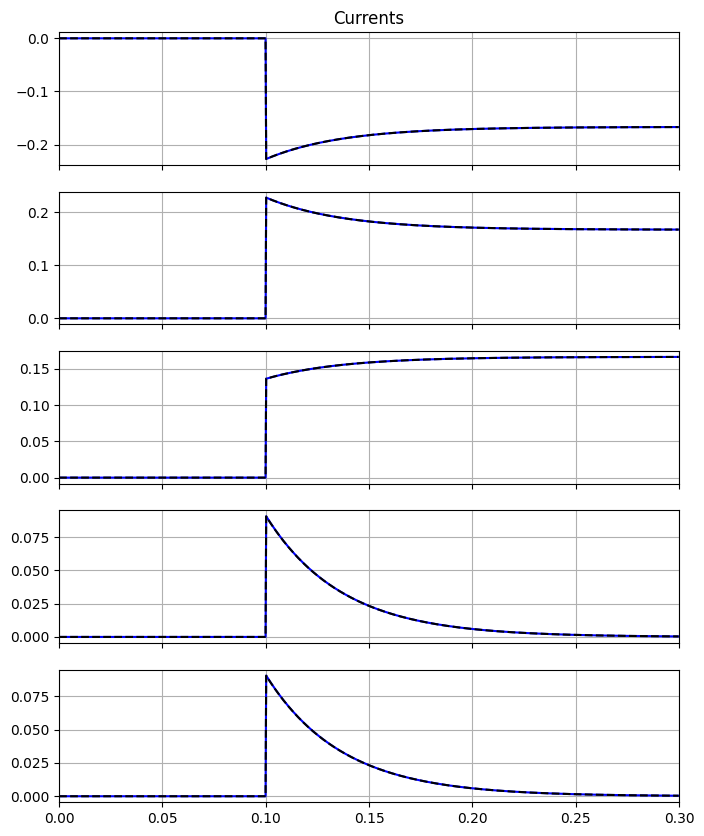

In [9]:
_, ax = plt.subplots(nrows=5, sharex=True, figsize=(8, 10))
ax[0].plot(*solution.get_current('Vs'), 'b-')
ax[0].plot(t, -iR1_ref, 'k--')
ax[0].grid(True)
ax[0].set_title('Currents')

ax[1].plot(*solution.get_current('R1'), 'b-')
ax[1].plot(solution.t, iR1_ref, 'k--')
ax[1].grid(True)

ax[2].plot(*solution.get_current('R2'), 'b-')
ax[2].plot(solution.t, iR2_ref, 'k--')
ax[2].grid(True)

ax[3].plot(*solution.get_current('R3'), 'b-')
ax[3].plot(solution.t, iR3_ref, 'k--')
ax[3].grid(True)

ax[4].plot(*solution.get_current('C'), 'b-')
ax[4].plot(solution.t, iC_ref, 'k--')
ax[4].grid(True)
ax[4].set_xlim((0, t_max))